# Preparation

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [2]:
test_df = pd.read_csv('test.csv')
train_df = pd.read_csv('train.csv')

In [3]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_df.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Ilett, Miss. Bertha",male,NaN,NaN,NaN,347082,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [6]:
pd.isnull(train_df).sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
clean_train_df = train_df[['Pclass', 'Survived', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
clean_train_df['Sex'] = clean_train_df['Sex'].map({'female': 1, 'male': 0})
mean_age = clean_train_df['Age'].mean()
btd_age = clean_train_df['Age'].std()
count_nan_age = pd.isnull(train_df).sum()['Age']
rand_1 = np.random.randint(mean_age - std_age, mean_age + std_age, size = count_nan_age)
clean_train_df["Age"][np.isnan(clean_train_df["Age"])] = rand_1
clean_train_df['Embarked'] = clean_train_df['Embarked'].fillna('S')

In [12]:
clean_train_df.describe()

,Pclass,Survived,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,0.383838,0.352413,29.587172,0.523008,0.381594,32.204208
std,0.836071,0.486592,0.477990,13.522284,1.102743,0.806057,49.693429
min,1.000000,0.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,21.000000,0.000000,0.000000,7.910400
50%,3.000000,0.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,1.000000,1.000000,38.000000,1.000000,0.000000,31.000000
max,3.000000,1.000000,1.000000,80.000000,8.000000,6.000000,512.329200


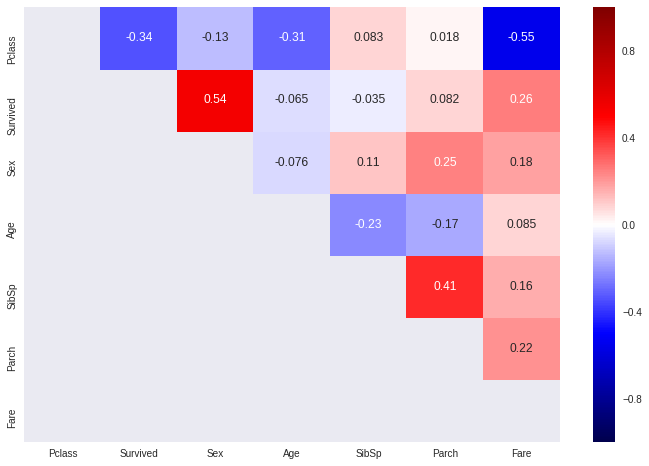

In [13]:
# heatmap correlation to 'Survived'
train_corr = clean_train_df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(train_corr, mask=np.tril(np.ones(train_corr.shape)), annot=True, cmap='seismic')

Percentage of females who survived: 74.20382165605095
Percentage of males who survived: 18.890814558058924


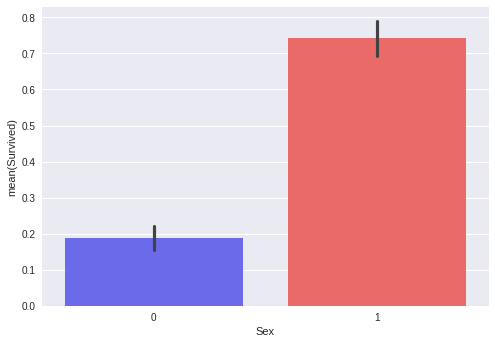

In [14]:
#draw a bar plot of survival by sex
sns.barplot(x="Sex", y="Survived", data=clean_train_df, palette='seismic')
print("Percentage of females who survived:", clean_train_df["Survived"][clean_train_df["Sex"] == 1].value_counts(normalize = True)[1]*100)
print("Percentage of males who survived:", clean_train_df["Survived"][clean_train_df["Sex"] == 0].value_counts(normalize = True)[1]*100)

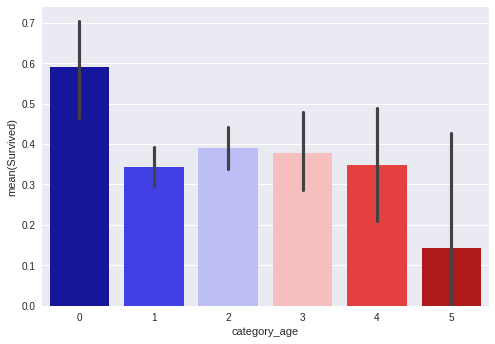

In [23]:
clean_train_df['Age'] = pd.cut(clean_train_df['Age'], bins=6, labels=False)
sns.barplot(x="category_age", y="Survived", data=clean_train_df, palette='seismic')

In [28]:
pd.concat([clean_train_df, pd.get_dummies(clean_train_df['category_age'], prefix='age_bin')], axis=1)

,Pclass,Survived,Name,Sex,Age,SibSp,Parch,Fare,Embarked,category_age,age_bin_0,age_bin_1,age_bin_2,age_bin_3,age_bin_4,age_bin_5
0,3,0,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,S,1,0,1,0,0,0,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C,2,0,0,1,0,0,0
2,3,1,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,S,1,0,1,0,0,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,S,2,0,0,1,0,0,0
4,3,0,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,S,2,0,0,1,0,0,0
5,3,0,"Moran, Mr. James",0,31.0,0,0,8.4583,Q,2,0,0,1,0,0,0
6,1,0,"McCarthy, Mr. Timothy J",0,54.0,0,0,51.8625,S,4,0,0,0,0,1,0
7,3,0,"Palsson, Master. Gosta Leonard",0,2.0,3,1,21.0750,S,0,1,0,0,0,0,0
8,3,1,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,11.1333,S,2,0,0,1,0,0,0
9,2,1,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,30.0708,C,1,0,1,0,0,0,0
